`@author`: N. Laanait  
`@date`: 04/29/19

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import h5py

## Data Files

1. Data is split up into batches... e.g `batch_*h5`.  
2. The file names are labeled according to their data partition... e.g. `batch_train*` belongs to training data.
3. `dev` and `test` are for development and testing, respectively.
4. __The data is not shuffled!__

In [2]:
f = h5py.File('/data/smc_19/batch_train_0.h5', mode='r', swmr=True)

Each particular data sample is stored in a separate `h5group`.  
Here are the names of the samples (i.e. groups) in the file.

In [3]:
keys = list(f.keys())
keys

['sample_0_0',
 'sample_10_0',
 'sample_11_0',
 'sample_12_0',
 'sample_13_0',
 'sample_14_0',
 'sample_15_0',
 'sample_17_0',
 'sample_18_0',
 'sample_1_0',
 'sample_20_0',
 'sample_21_0',
 'sample_22_0',
 'sample_23_0',
 'sample_25_0',
 'sample_26_0',
 'sample_27_0',
 'sample_28_0',
 'sample_29_0',
 'sample_2_0',
 'sample_30_0',
 'sample_31_0',
 'sample_32_0',
 'sample_33_0',
 'sample_34_0',
 'sample_35_0',
 'sample_37_0',
 'sample_38_0',
 'sample_39_0',
 'sample_3_0',
 'sample_41_0',
 'sample_42_0',
 'sample_43_0',
 'sample_44_0',
 'sample_45_0',
 'sample_46_0',
 'sample_47_0',
 'sample_48_0',
 'sample_49_0',
 'sample_50_0',
 'sample_51_0',
 'sample_52_0',
 'sample_53_0',
 'sample_55_0',
 'sample_56_0',
 'sample_57_0',
 'sample_58_0',
 'sample_59_0',
 'sample_6_0',
 'sample_7_0',
 'sample_8_0']

## Data Attributes  
With each `sample` is associated different attributes.

In [4]:
idx = np.random.randint(0, len(list(f.keys())))
key = keys[idx]
group = f[key]
list(group.attrs.items())

[('space_group', b'2'),
 ('material', b'mp-763064'),
 ('energy_keV', 100),
 ('z_dirs', array([[[ 1,  1,  0],
          [ 1, -1,  1],
          [-1,  1,  3]]])),
 ('y_dirs', array([[[-1.33333333,  1.        , -1.        ],
          [ 0.66666667,  0.        ,  1.        ],
          [-0.66666667,  0.        , -1.        ]]])),
 ('semi_angles_rad', array([0.00276776, 0.0028678 , 0.00367309])),
 ('d_hkls_angstrom', array([3.34336566, 3.22673953, 2.51930512])),
 ('abc_angstrom', array([4.6456035 , 7.54737513, 7.59231027])),
 ('angles_degree', array([75.75270737, 91.58467769, 89.08634999])),
 ('formula', 'Fe8 O14 F2')]

1. `material` is the material name (solids) as cataloged in the materials project https://materialsproject.org/ 
2. `energy_keV` is the electron beam energy (in keV).
3. `z_dir` are the crystallographic (hkl) normal directions of the material from which CBED was acquired.
4. `y_dir` are the crystallographic (hkl) transverse directions of the material from which CBED was acquired.
5. `semi_angles_rad` are the half-angles of convergence of the incident electron beam (in radians).
6. `d_hkls_angstrom` are the d-spacing of the Bragg reflections from which CBED was acquired (in Å).
7. `abc_angstrom` are the lattice constants $(a,b,c)$ of the material (in Å).
8. `angles_degree` are the lattice angles $(\alpha, \beta, \gamma)$ of the material (in degrees).
9. `chemical formula` is the chemical formula of the material.

__And__ 
0. `space_group` __is the space group number (1 - 230) as specified by the conventions of crystallography__. see https://en.wikipedia.org/wiki/List_of_space_groups

In addition to the classification task of the space group `0`, the following attributes can be used as labels in a multi-task ML algorithm: `2`, `6`, `7`, `8`, and `9`.

## Data
The data for each sample is saved as `h5dataset`, with name `cbed_stack`, with dimensions of (3,512,512).  
The first axis contains the 3 different crystallographic directions or material orientations (corresponding to `z_dirs` and `y_dirs`).  
The 2nd and 3rd axis are the diffraction intensities (in reciprocal space).

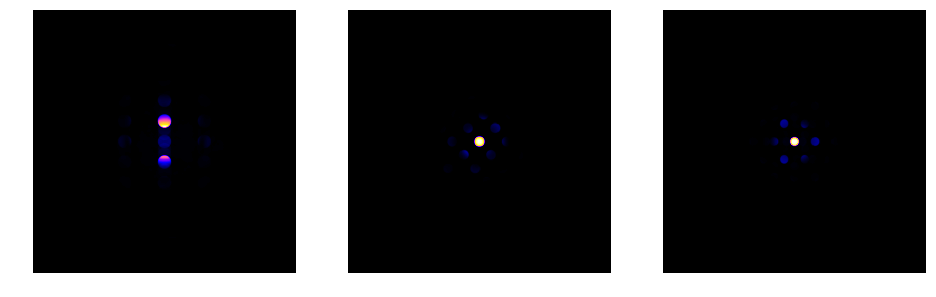

In [5]:
idx = np.random.randint(0, len(list(f.keys())))
key = keys[idx]
group = f[key]
list(group.items())
cbed_stack = group['cbed_stack'][()]
list(group.attrs.items())
fig, axes = plt.subplots(1,3, figsize=(16,12))
for ax, cbed in zip(axes.flatten(), cbed_stack):
    ax.imshow(cbed, cmap='gnuplot2')
    ax.axis('off')

### Note  
CBED data will always have orders of magnitude intensity change from the center of the image.  
As such __proper scaling__ should always be applied. The appropriate scaling function is up to you. Below is $^{1/4}$ scaling.


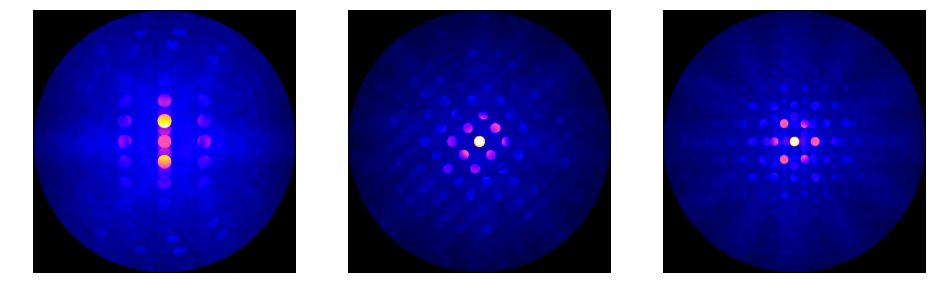

In [6]:
fig, axes = plt.subplots(1,3, figsize=(16,12))
for ax, cbed in zip(axes.flatten(), cbed_stack):
    ax.imshow(cbed**0.25, cmap='gnuplot2')
    ax.axis('off')
plt.show()